### read in unnormalizated data

In [11]:
data<-as.data.frame(read.table("data/20190617-SY-IDQ180-raw-aa&amines.csv",sep=",",header=T,row.names=1,stringsAsFactors=F))
#data[is.na(data)]=0
data<- t(data)
data[1:5,]
dim(data)


,Group,Ala,Arg,Asn,Asp,Cit,Gln,Glu,Gly,His,⋯,Trp,Tyr,Val,ADMA,Creatinine,Kynurenine,SDMA,Sarcosine,Taurine,t4-OH-Pro
LOD..calc..,LOD (calc.),4.23,0.5,1.5,1.5,1,1.5,1.48,0.5,0.5,⋯,0.5,0.5,0.5,0.08,1,0.3,0.039,0.3,0.8,0.1
GX007,Cancer,395,77.5,62.1,7.22,39,787,52.4,289,68.9,⋯,44.1,53.6,222,0.573,81.4,2.82,0.639,5.54,46.9,22
GX009,Cancer,242,93,44.6,4.44,39.4,723,127,244,70.4,⋯,39.5,51.9,281,0.643,54.3,2.04,0.609,5,33.4,12.7
GX013,Cancer,273,81.7,47.3,4.43,36.5,616,37.2,254,63.7,⋯,31.3,53.2,135,0.541,45,0.866,0.594,4.33,36.3,6.16
JC.repeat.01,Normal,367,70.7,49.4,3.58,26.8,555,67.8,242,78.7,⋯,71.2,60.3,225,0.481,55.9,1.76,0.407,3.37,47.5,24.5


[1] 79 29

### impute N.D. / NA

In [6]:
cancer<-data[grep(pattern="Cancer",data[,1]),]
cancer<-rbind(data[1,],cancer)
normal<-data[grep(pattern="Normal",data[,1]),]
normal<-rbind(data[1,],normal)
#cancer[1:3,]
#normal[1:3,]

normal<-t(normal)
imputeNO<-lapply(2:(dim(normal)[1]),function(x){
    half_LOD=0.5*as.numeric(as.character(normal[x,1]))
    #half_LOD
    feature<-normal[x,]
    feature[is.na(feature)]<-half_LOD
    #feature
    return(feature)
      } )

cancer<-t(cancer)
imputeCAN<-lapply(2:(dim(cancer)[1]),function(x){
    half_LOD=0.5*as.numeric(as.character(cancer[x,1]))
    #half_LOD
    feature<-cancer[x,]
    feature[is.na(feature)]<-half_LOD
    #feature
    return(feature)
      } )

normal<-as.data.frame(do.call(rbind,imputeNO),stringsAsFactors = F)
cancer<-as.data.frame(do.call(rbind,imputeCAN),stringsAsFactors = F)
row.names(normal)<-colnames(data)[-1]
row.names(cancer)<-colnames(data)[-1]
#normal[1:3,]
#cancer[1:3,]
normal=as.data.frame(lapply(normal,as.numeric))
cancer=as.data.frame(lapply(cancer,as.numeric))
#normal<-t(normal[,-1])
#cancer<-t(cancer[,-1])
row.names(normal)<-colnames(data)[-1]
row.names(cancer)<-colnames(data)[-1]
normal[1:3,]
cancer[1:3,]


,V1,JC.repeat.01,JC.repeat.02,JC.repeat.03,JC40002PL.02,JC40003PL.02,JC40004PL.02,JC40005PL.02,JC40006PL.02,JC40008PL.02,⋯,JC50020PL.02,JC50021PL.02,JC50022PL.02,JC50023PL.02,JC50024PL.02,JC50025PL.02,JC50026PL.02,JC50027PL.02,JC50028PL.02,JC50029PL.02
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ala,4.23,367.0,426.0,336.0,0.00,275.0,283.0,317.0,342.0,316.0,⋯,338.0,467.0,468.0,703,440.0,489.0,473,451.0,418.0,400.0
Arg,0.50,70.7,76.0,48.4,98.90,62.2,65.1,46.2,62.4,42.6,⋯,86.1,130.0,122.0,107,81.2,74.3,111,119.0,148.0,106.0
Asn,1.50,49.4,49.8,61.3,0.75,46.6,44.6,53.7,46.8,63.3,⋯,43.5,54.9,52.2,66,44.2,40.5,45,49.7,58.6,45.4


,V1,GX007,GX009,GX013,SY682,SY687,SY688,SY699,SY701,SY702,⋯,SY783,SY787,SY789,SY790,SY801,SY803,SY804,SY805,SY806,SY807
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ala,4.23,395.0,242.0,273.0,278.0,318.0,200.0,461.0,125.0,484.0,⋯,185.0,291.0,358.0,402.0,483.0,352.0,317.0,345.0,256.0,437.0
Arg,0.50,77.5,93.0,81.7,62.6,85.3,100.0,113.0,30.8,131.0,⋯,84.8,34.8,69.8,40.8,41.7,45.9,90.1,88.3,24.9,70.3
Asn,1.50,62.1,44.6,47.3,45.1,43.9,32.5,44.5,29.2,61.1,⋯,37.7,36.0,35.7,38.8,38.1,38.0,46.0,37.7,29.7,48.9


### remove outlier


##### feature analysis

,name,mean,sd,max,min,note
,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
1,Gln,622.730769230769,97.0523587537178,846,282,REMOVE
2,Ala,346.025641025641,125.001088240351,703,0,REMOVE
3,Gly,243.371794871795,59.2226941790688,405,115,PASS
4,Val,222.953846153846,64.5223905409501,387,85.5,PASS
5,Lys,196.770512820513,60.4921699537025,331,89.1,PASS
6,Pro,186.365384615385,91.7123903976314,584,66.5,PASS
7,Leu,142.061538461538,47.8484844330253,292,45.2,PASS
8,Ser,122.661538461538,26.680900463636,183,55,PASS
9,Thr,119.364102564103,36.5777981570148,213,0,PASS


[1] Gln Ala
28 Levels: ADMA Ala Arg Asn Asp Cit Creatinine Gln Glu Gly His ... Val

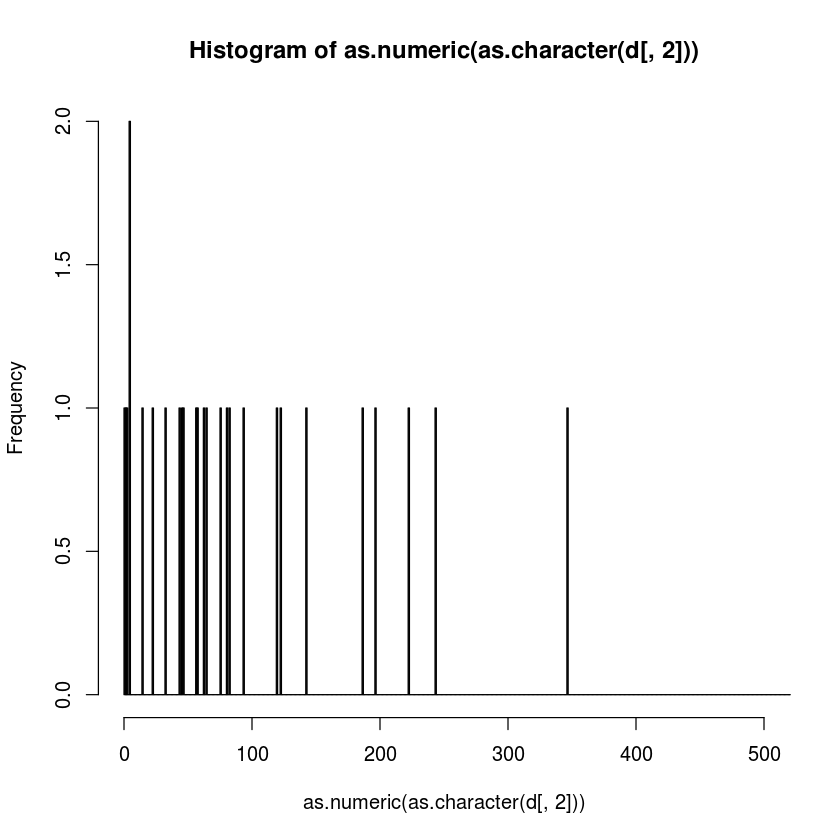

In [683]:
library(magrittr) # needs to be run every time you start R and want to use %>%
library(dplyr)    # alternatively, this also loads %>%
#check distribution of features
dataImpute<-cbind(normal[,-1],cancer[,-1])
#data_impute


#devide the number of features
cal<-lapply(1:(dim(dataImpute)[1]),function(x){
    name<-row.names(dataImpute[x,])
    sd<-sd(dataImpute[x,])
    max<-max(dataImpute[x,])
    min<-min(dataImpute[x,])
    mean<-sum(dataImpute[x,])/dim(dataImpute)[2]
    re<-c(name,mean,sd,max,min)
    return(re)
  } )
d<-do.call(rbind, cal)
d<-as.data.frame(d,StringasFactor=False)
colnames(d)<-c("name","mean","sd","max","min")
d<-d[order(as.numeric(as.character(d[,2])),decreasing = T),]
d<-d%>%mutate(note = ifelse(as.numeric(as.character(d[,2]))>300,"REMOVE",ifelse(as.numeric(as.character(d[,3]))>0,"PASS","LowSD")))
d[1:10,]
d[d[,6]=="REMOVE",]$name
#d[d[,"note"]=="LowSD",]

hist(as.numeric(as.character(d[,2])),breaks=500,xlim=c(0,500))

###### remove features

In [605]:
#colnames(data)
dim(data)
#data_rm<-data[,-which(colnames(data)%in%c("H1","PC aa C34:2","PC aa C36:2","PC aa C34:1","PC aa C36:4"))]
data_rm<-data[,-which(colnames(data)%in%c("Gln","Ala"))]
#data_rm<-data[,-which(colnames(data)%in%c("H1","PC aa C34:2"))]
dim(data_rm)
#colnames(data_rm)

[1] 79 29

[1] 79 27

##### remove samples

In [280]:
data<-data_rm
#rownames(data)
dim(data)
data_rm<-data[-which(rownames(data)%in%"SY747"),]
dim(data_rm)
rownames(data_rm)

[1] 79 22

[1] 78 22

[1] "LOD..calc.."  "GX007"        "GX009"        "GX013"        "JC.repeat.01"
 [6] "JC.repeat.02" "JC.repeat.03" "JC40002PL.02" "JC40003PL.02" "JC40004PL.02"
[11] "JC40005PL.02" "JC40006PL.02" "JC40008PL.02" "JC40009PL.02" "JC40010PL.02"
[16] "JC40011PL.02" "JC40012PL.02" "JC40013PL.02" "JC40014PL.02" "JC50006PL.02"
[21] "JC50007PL.02" "JC50008PL.02" "JC50009PL.02" "JC50010PL.02" "JC50011PL.02"
[26] "JC50012PL.02" "JC50013PL.02" "JC50014PL.02" "JC50015PL.02" "JC50016PL.02"
[31] "JC50017PL.02" "JC50018PL.02" "JC50019PL.02" "JC50020PL.02" "JC50021PL.02"
[36] "JC50022PL.02" "JC50023PL.02" "JC50024PL.02" "JC50025PL.02" "JC50026PL.02"
[41] "JC50027PL.02" "JC50028PL.02" "JC50029PL.02" "SY682"        "SY687"       
[46] "SY688"        "SY699"        "SY701"        "SY702"        "SY703"       
[51] "SY704"        "SY712"        "SY714"        "SY718"        "SY727"       
[56] "SY730"        "SY737"        "SY738"        "SY743"        "SY745"       
[61] "SY748"        "SY749"        "SY759"        "SY761"        "SY766"       
[66] "SY775"        "SY776"        "SY780"        "SY783"        "SY787"       
[71] "SY789"        "SY790"        "SY801"        "SY803"        "SY804"       
[76] "SY805"        "SY806"        "SY807"

### sample analysis

[1] 39

[1] 39

[1] 562.2075

[1] 563.2059

[1] 3162.248

[1] 2785.118

[1] 4742.394

[1] 2093.167

[1] 4183.557

[1] 1350.706

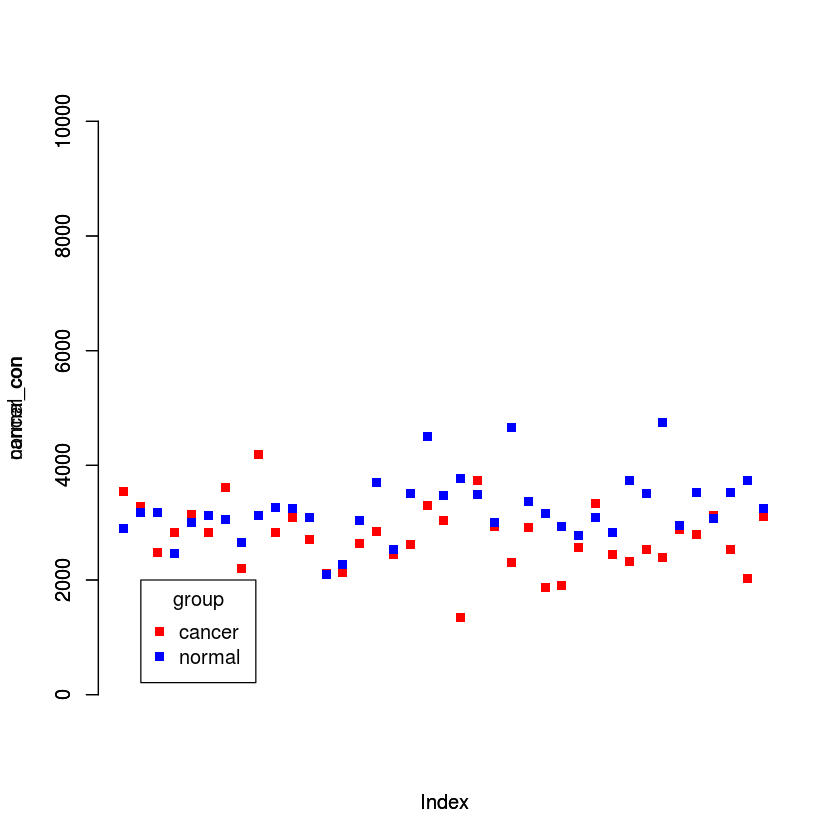

,mean,group
,<dbl>,<chr>
GX007,126.8211,cancer
GX009,117.0511,cancer


[1] 78  2

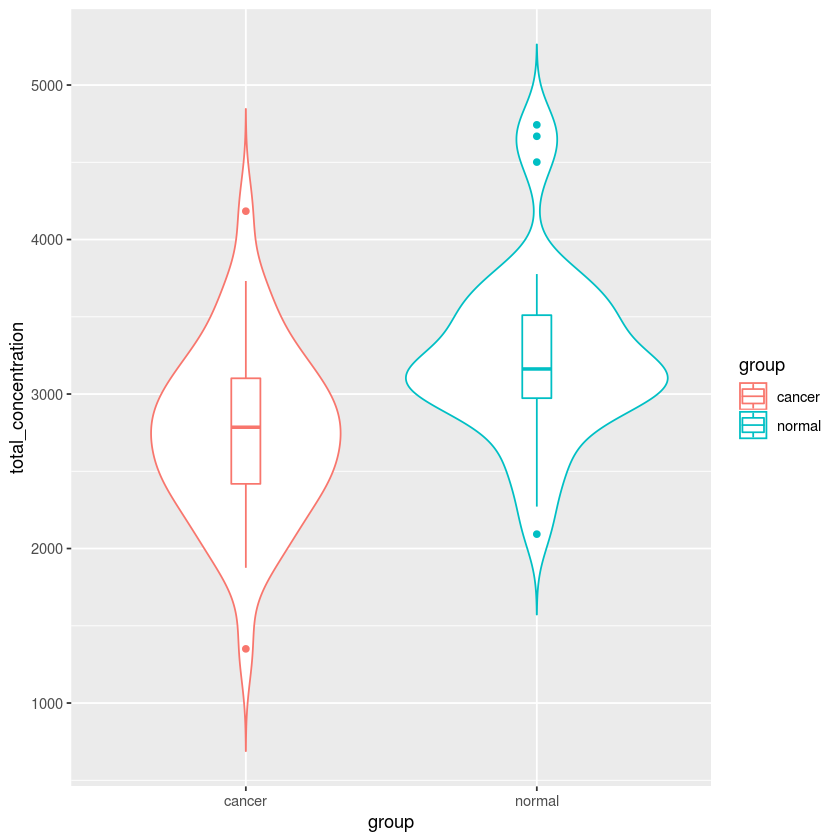

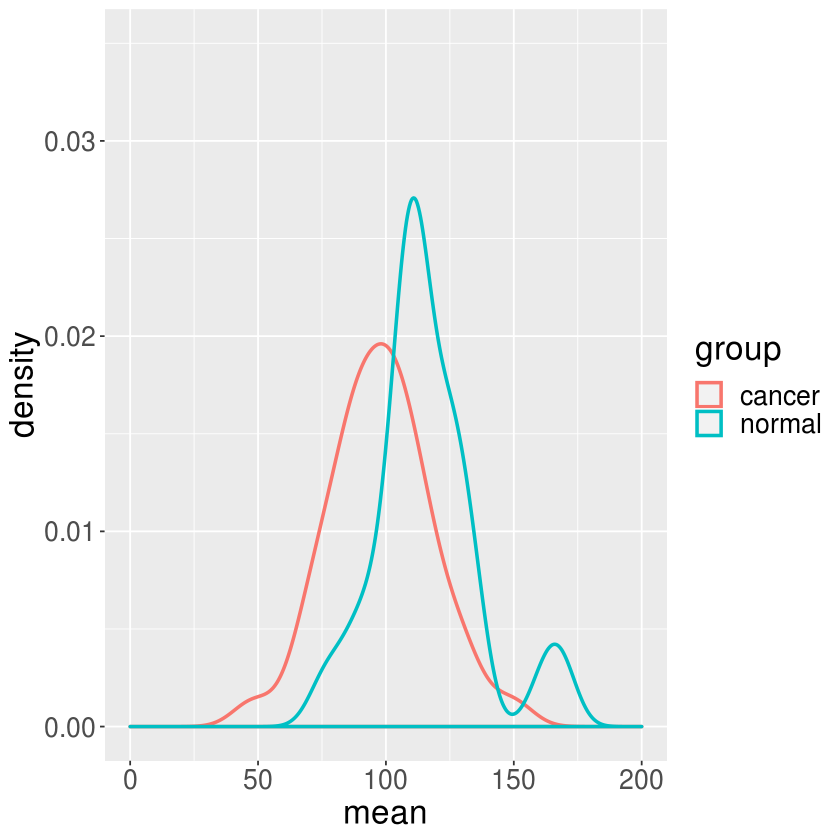

In [8]:
#data<-data_rm

cancer<-data[grep(pattern="Cancer",data[,1]),]
cancer<-rbind(data[1,],cancer)
normal<-data[grep(pattern="Normal",data[,1]),]
normal<-rbind(data[1,],normal)
#cancer[1:3,]
#normal[1:3,]

normal<-t(normal)
imputeNO<-lapply(2:(dim(normal)[1]),function(x){
    half_LOD=0.5*as.numeric(as.character(normal[x,1]))
    #half_LOD
    feature<-normal[x,]
    feature[is.na(feature)]<-half_LOD
    #feature
    return(feature)
      } )

cancer<-t(cancer)
imputeCAN<-lapply(2:(dim(cancer)[1]),function(x){
    half_LOD=0.5*as.numeric(as.character(cancer[x,1]))
    #half_LOD
    feature<-cancer[x,]
    feature[is.na(feature)]<-half_LOD
    #feature
    return(feature)
      } )

normal<-as.data.frame(do.call(rbind,imputeNO),stringsAsFactors = F)
cancer<-as.data.frame(do.call(rbind,imputeCAN),stringsAsFactors = F)
row.names(normal)<-colnames(data)[-1]
row.names(cancer)<-colnames(data)[-1]
#normal[1:3,]
#cancer[1:3,]
normal=as.data.frame(lapply(normal,as.numeric))
cancer=as.data.frame(lapply(cancer,as.numeric))
#normal<-t(normal[,-1])
#cancer<-t(cancer[,-1])
row.names(normal)<-colnames(data)[-1]
row.names(cancer)<-colnames(data)[-1]
#normal[1:3,]
#cancer[1:3,]

#statistics
library(ggplot2)
# calculate the hervs expressing level for each tummor sample
cancer_con <- apply(cancer[,-1],2,sum)
#cancer_con[1:2]
#cancer_con
normal_con <- apply(normal[,-1],2,sum)
#normal_con[1:2]
#normal_con

#check sample group size
length(normal_con)
length(cancer_con)

#Standard deviation
sd(normal_con)
sd(cancer_con)

#Standard deviation
median(normal_con)
median(cancer_con)

#data arrange
max(normal_con)
min(normal_con)
max(cancer_con)
min(cancer_con)

plot(cancer_con,pch=15,col="red",ylim=c(0,10000),bty = "n", xaxt = "n")
par(new=TRUE)
plot(normal_con,pch=15,col="blue",,ylim=c(0,10000),bty = "n", xaxt = "n")
legend(2,2000,c("cancer","normal"), col = c("red","blue"),pch=15, title="group")

#bean plot
bean1<-as.data.frame(normal_con)
bean1$group<-"normal"
bean2<-as.data.frame(cancer_con)
bean2$group<-"cancer"
colnames(bean1)=c("total_concentration","group")
colnames(bean2)=c("total_concentration","group")
bean<-rbind(bean1,bean2)
#bean[1:2,]
#bean$group<-as.factor(bean$group)
p<-ggplot(bean, aes(x=group, y=total_concentration, color=group)) +
  geom_violin(trim=FALSE) +geom_boxplot(width=0.1)
p

library(ggplot2)
# calculate the hervs expressing level for each tummor sample
normal_median <- as.data.frame(apply(normal[,-1],2,mean))
normal_median$group="normal"
colnames(normal_median)[1]="mean"
#normal_median[1:2,]
cancer_median <- as.data.frame(apply(cancer[,-1],2,mean))
cancer_median$group="cancer"
colnames(cancer_median)[1]="mean"
#cancer_median[1:2,]
median<-rbind(cancer_median,normal_median)
median[1:2,]
dim(median)
p<-ggplot(median,aes(x = mean))
p+ geom_density(aes(color = group),size =1,alpha=3) +theme(text = element_text(size=20))+xlim(0,200)+ylim(0,0.035)

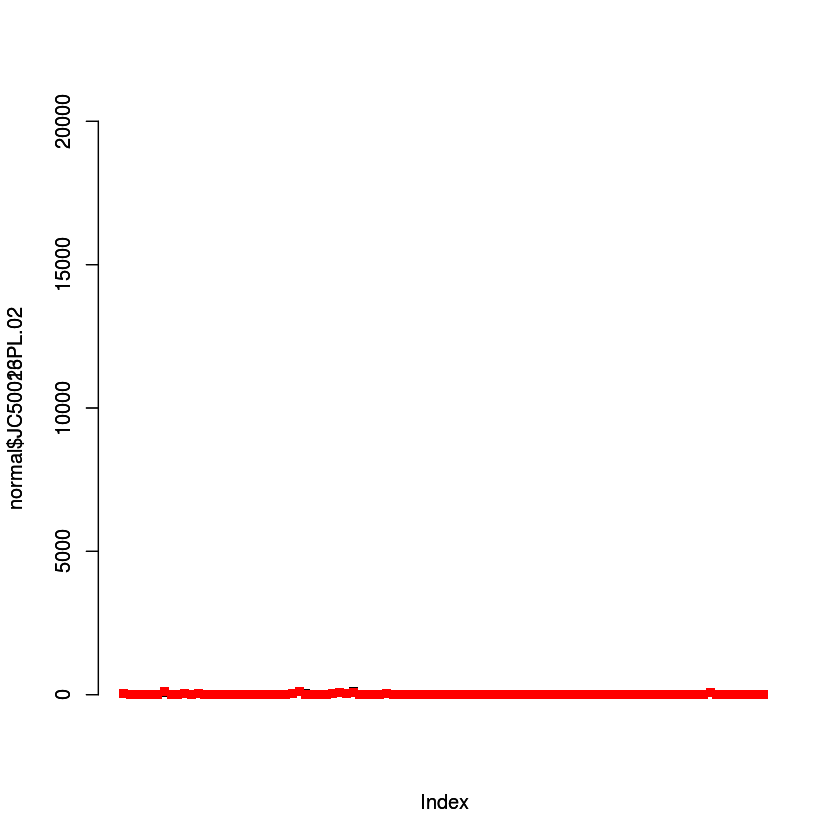

In [225]:
plot(normal$JC50016PL.02,ylim=c(0,20000),pch=15,bty = "n", xaxt = "n")
par(new=TRUE)
plot(normal$JC50023PL.02,col="red",ylim=c(0,20000),pch=15,bty = "n", xaxt = "n")
#par(new=TRUE)
#plot(cancer$SY682,col="grey",ylim=c(0,500),pch=15,bty = "n", xaxt = "n")

### output data without normalization

In [9]:
a=dim(normal)[2]-1
group=rep("normal", times=a)
normal_1<-rbind(group,normal)
#normal
a=dim(cancer)[2]-1
group=rep("cancer", times=a)
cancer_1<-rbind(group,cancer)
#column 1 is LOD
dataout<-cbind(normal_1[,-1],cancer_1[,-1])
row.names(dataout)[1]="Group"
dataout[1:5,]
#write.csv(dataout,file="data/remains_data_without_nor.csv",quote=F,row.names=T)

,JC.repeat.01,JC.repeat.02,JC.repeat.03,JC40002PL.02,JC40003PL.02,JC40004PL.02,JC40005PL.02,JC40006PL.02,JC40008PL.02,JC40009PL.02,⋯,SY783,SY787,SY789,SY790,SY801,SY803,SY804,SY805,SY806,SY807
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Group,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,⋯,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer
Ala,367,426,336,0,275,283,317,342,316,322,⋯,185,291,358,402,483,352,317,345,256,437
Arg,70.7,76,48.4,98.9,62.2,65.1,46.2,62.4,42.6,66.2,⋯,84.8,34.8,69.8,40.8,41.7,45.9,90.1,88.3,24.9,70.3
Asn,49.4,49.8,61.3,0.75,46.6,44.6,53.7,46.8,63.3,51.9,⋯,37.7,36,35.7,38.8,38.1,38,46,37.7,29.7,48.9
Asp,3.58,4.7,4.63,0,6.29,2.62,4.52,3.22,3.86,2.87,⋯,4.73,3,3.24,0.75,5.03,6.61,3.87,3.46,6.71,2.34


### normalization

In [11]:
library(dplyr)
#cancer group and normal group should normalized together
library(preprocessCore)
a=as.data.frame(lapply(dataout[-1,],as.numeric))
row.names(a)<-rownames(dataout)[-1]
#a[1:2,]
data_nor=normalize.quantiles(as.matrix(a), copy = F)

#data_nor=normalize(as.matrix(a), method="Z-score")
data_nor[1:2,]

## calculate directly 
#quantile_normalisation <- function(df){
#  df_rank <- apply(df,2,rank,ties.method="min")
#  df_sorted <- data.frame(apply(df, 2, sort))
#  df_mean <- apply(df_sorted, 1, mean)

#  index_to_mean <- function(my_index, my_mean){
#    return(my_mean[my_index])
#  }
#df_final <- apply(df_rank, 2, index_to_mean, my_mean=df_mean)
# rownames(df_final) <- rownames(df)
#  return(df_final)
#}

#quantile_normalisation(a)
dataout_nor<-rbind(dataout[1,],data_nor)
#write.csv(dataout_nor,file="data/aa-amine_data_nor_RM2.csv",quote=F,row.names=T)

,JC.repeat.01,JC.repeat.02,JC.repeat.03,JC40002PL.02,JC40003PL.02,JC40004PL.02,JC40005PL.02,JC40006PL.02,JC40008PL.02,JC40009PL.02,⋯,SY783,SY787,SY789,SY790,SY801,SY803,SY804,SY805,SY806,SY807
Ala,360.69231,360.69231,360.69231,5.059103,270.74359,222.47564,360.69231,360.69231,360.69231,360.69231,⋯,270.7436,360.69231,360.69231,360.69231,360.69231,360.69231,315.71795,360.6923,360.69231,360.69231
Arg,71.17949,71.17949,45.80192,112.753846,71.17949,66.33462,45.80192,66.33462,41.15705,62.21538,⋯,112.7538,41.15705,99.18333,71.17949,45.80192,51.20808,78.13462,127.7192,35.39487,71.17949


##### combine 2 group normalizated data

In [12]:
data_remain_nor<-as.data.frame(read.table("data/remains_data_nor_NORM.csv",sep=",",header=T,row.names=1,stringsAsFactors=F))
data_remain_nor[1:3,]
data_aa_nor<-as.data.frame(read.table("data/aa-amine_data_nor_NORM.csv",sep=",",header=T,row.names=1,stringsAsFactors=F))
data_aa_nor[1:3,]
data_nor_combin<-rbind(data_remain_nor[-1,],data_aa_nor[-1,])
data_nor_combin=as.data.frame(lapply(data_nor_combin,as.numeric))
#data_nor_combin=rbind(data_remain_nor[1,],data_nor_combin)
#name<-combine(row.names(data_remain_nor),row.names(data_aa_nor)[-1])
#name
#row.names(data_nor_combin)<-name
dataout_nor<-data_nor_combin
dim(dataout_nor)
#data_nor_combin[1:2,]
dataout_nor[1:2,]

,JC.repeat.01,JC.repeat.02,JC.repeat.03,JC40002PL.02,JC40003PL.02,JC40004PL.02,JC40005PL.02,JC40006PL.02,JC40008PL.02,JC40009PL.02,⋯,SY783,SY787,SY789,SY790,SY801,SY803,SY804,SY805,SY806,SY807
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Group,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,⋯,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer
C0,14.1571794871795,29.4788461538462,44.3166666666667,32.8020512820513,29.4788461538462,22.0415384615385,44.3166666666667,14.5866025641026,29.4788461538462,32.8020512820513,⋯,37.7576923076923,37.7576923076923,29.4788461538462,44.3166666666667,22.0415384615385,37.7576923076923,26.9412820512821,24.5466666666667,44.3166666666667,29.4788461538462
C2,1.82646153846154,3.16152564102564,12.1515384615385,10.0412820512821,11.2379487179487,9.44564102564103,12.8586538461538,1.82646153846154,6.52807692307692,13.2615384615385,⋯,5.37141025641026,7.33076923076923,2.31851282051282,9.44564102564103,8.57153846153846,8.57153846153846,6.09820512820513,2.03539743589744,26.9412820512821,7.71217948717949


,JC.repeat.01,JC.repeat.02,JC.repeat.03,JC40002PL.02,JC40003PL.02,JC40004PL.02,JC40005PL.02,JC40006PL.02,JC40008PL.02,JC40009PL.02,⋯,SY783,SY787,SY789,SY790,SY801,SY803,SY804,SY805,SY806,SY807
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Group,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,⋯,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer
Ala,360.692307692308,360.692307692308,360.692307692308,5.05910256410256,270.74358974359,222.475641025641,360.692307692308,360.692307692308,360.692307692308,360.692307692308,⋯,270.74358974359,360.692307692308,360.692307692308,360.692307692308,360.692307692308,360.692307692308,315.717948717949,360.692307692308,360.692307692308,360.692307692308
Arg,71.1794871794872,71.1794871794872,45.8019230769231,112.753846153846,71.1794871794872,66.3346153846154,45.8019230769231,66.3346153846154,41.1570512820513,62.2153846153846,⋯,112.753846153846,41.1570512820513,99.1833333333333,71.1794871794872,45.8019230769231,51.2080769230769,78.1346153846154,127.719230769231,35.3948717948718,71.1794871794872


[1] 129  78

,JC.repeat.01,JC.repeat.02,JC.repeat.03,JC40002PL.02,JC40003PL.02,JC40004PL.02,JC40005PL.02,JC40006PL.02,JC40008PL.02,JC40009PL.02,⋯,SY783,SY787,SY789,SY790,SY801,SY803,SY804,SY805,SY806,SY807
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.157179,29.478846,44.31667,32.80205,29.47885,22.041538,44.31667,14.586603,29.478846,32.80205,⋯,37.75769,37.757692,29.478846,44.316667,22.041538,37.757692,26.941282,24.546667,44.31667,29.478846
2,1.826462,3.161526,12.15154,10.04128,11.23795,9.445641,12.85865,1.826462,6.528077,13.26154,⋯,5.37141,7.330769,2.318513,9.445641,8.571538,8.571538,6.098205,2.035397,26.94128,7.712179


##### see normalization result

[1] 78  2

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


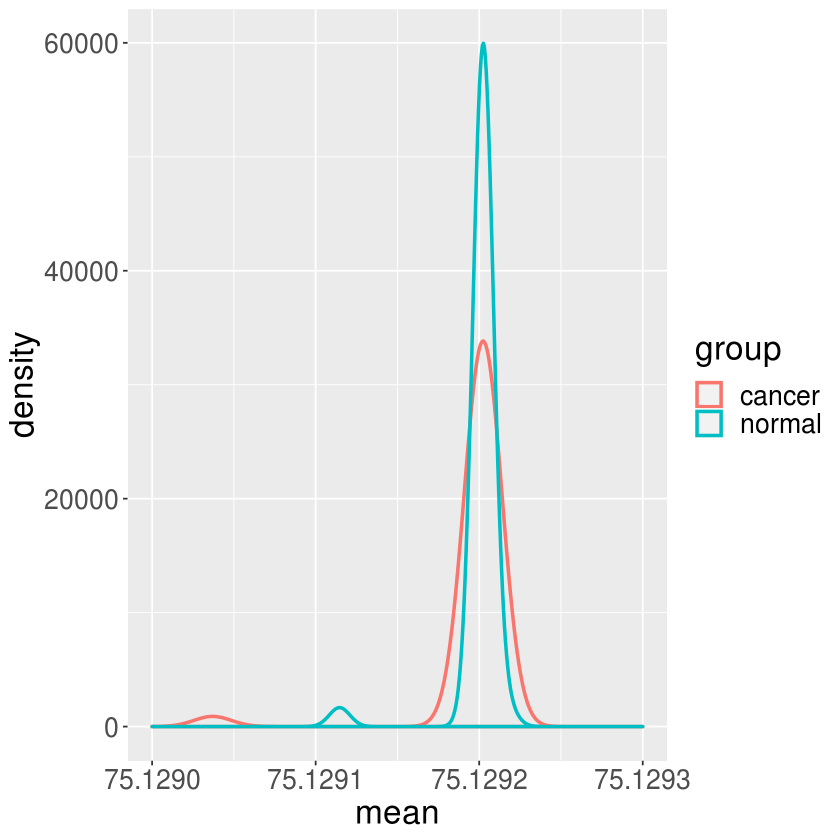

In [13]:
library(ggplot2)

a=dim(normal)[2]-1
b=dim(data_nor)[2]
normal_sta <- as.data.frame(apply(dataout_nor[,c(1:a)],2,mean))
normal_sta$group="normal"
colnames(normal_sta)[1]="mean"
#normal_median[1:2,]
a=dim(normal)[2]
cancer_sta<- as.data.frame(apply(dataout_nor[,c(a:b)],2,mean))
cancer_sta$group="cancer"
colnames(cancer_sta)[1]="mean"
#cancer_median[1:2,]
sta<-rbind(normal_sta,cancer_sta)
#sta
dim(sta)
p<-ggplot(sta,aes(x = mean))
p+ geom_density(aes(color = group),size =1,alpha=0.5)+theme(text = element_text(size=20))+xlim(75.1290,75.1293)

### PLS-DA

In [1]:
data_nor<-as.data.frame(read.table("data/IDQ180_NORM_qnor_autoscall.csv",sep=",",header=T,row.names=1,stringsAsFactors=F))
#data_nor<-data_nor_combin
data_nor[1:2,]
data_nor_num=as.data.frame(lapply(data_nor,as.numeric))
row.names(data_nor_num)<-row.names(data_nor)
#data_nor_num<-rbind(data_nor[1,],data_nor_num)
data_nor_num<-data_nor_num[,-1]
data_nor_num[1:2,]
dim(data_nor_num)
#group<-as.data.frame(data[-1,1])
#group[1:5,]

,Label,Ala,Arg,Asn,Asp,Cit,Gln,Glu,Gly,His,⋯,SM..OH..C24.1,SM.C16.0,SM.C16.1,SM.C18.0,SM.C18.1,SM.C20.2,SM.C24.0,SM.C24.1,SM.C26.0,SM.C26.1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GX007,cancer,0.3784306,0.08392804,1.35300909,0.1789470,-0.3412076,0.1132277,-0.3926551,0.3447160,-1.3625264,⋯,-0.5425305,-0.1643331,0.32089585,0.1923296,1.08169090,-0.3424393,0.5471206,0.2734191,0.003512334,-0.4191987
GX009,cancer,-1.9615511,0.08392804,0.09796407,-0.4744501,0.2527143,0.1132277,0.9973204,-0.5065311,-0.9807543,⋯,0.7040583,1.9663536,0.02732124,1.7083101,-0.09641774,1.1976776,-0.3631814,2.5934359,-0.831321341,1.3322179


Warning message in lapply(data_nor, as.numeric):
“NAs introduced by coercion”


,Ala,Arg,Asn,Asp,Cit,Gln,Glu,Gly,His,Ile,⋯,SM..OH..C24.1,SM.C16.0,SM.C16.1,SM.C18.0,SM.C18.1,SM.C20.2,SM.C24.0,SM.C24.1,SM.C26.0,SM.C26.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GX007,0.3784306,0.08392804,1.35300909,0.1789470,-0.3412076,0.1132277,-0.3926551,0.3447160,-1.3625264,0.8801948,⋯,-0.5425305,-0.1643331,0.32089585,0.1923296,1.08169090,-0.3424393,0.5471206,0.2734191,0.003512334,-0.4191987
GX009,-1.9615511,0.08392804,0.09796407,-0.4744501,0.2527143,0.1132277,0.9973204,-0.5065311,-0.9807543,1.5284680,⋯,0.7040583,1.9663536,0.02732124,1.7083101,-0.09641774,1.1976776,-0.3631814,2.5934359,-0.831321341,1.3322179


[1]  78 128

In [2]:
library(ropls)
sacurine.plsda <- opls(x = data_nor_num, y = data_nor[,1], orthoI = 0)
sacurine.plsda

par(mfrow = c(1, 2))
plot(sacurine.plsda, typeVc = 'x-score', parAsColFcVn = as.factor(data_nor[,1]))
plot(sacurine.plsda, typeVc = 'x-loading')


#带模型预测性能评估的执行命令
#如下示例，奇数行的数据用于构建 PLS-DA，偶数行的数据测试 PLS-DA
#此外还可以自定义截取数据子集构建训练集或测试集等
sacurine.plsda <- opls(x = data_nor_num, y = data_nor[,1], orthoI = 0, subset = "odd")
sacurine.plsda

#check training set
trainVi <- getSubsetVi(sacurine.plsda)
table(data_nor[,1][trainVi], fitted(sacurine.plsda))
fitted(sacurine.plsda)
 
#check testing set
#data_nor_num[-trainVi, ]<-rbind(data_nor_num[-trainVi, ],data_nor[c("SY807","SY803"),-1])
table(data_nor[,1][-trainVi], predict(sacurine.plsda, data_nor_num[-trainVi, ]))
predict(sacurine.plsda, data_nor_num[-trainVi, ])

PLS-DA
78 samples x 128 variables and 1 response
standard scaling of predictors and response(s)
      R2X(cum) R2Y(cum) Q2(cum) RMSEE pre ort pR2Y  pQ2
Total    0.209    0.788   0.655 0.235   2   0 0.05 0.05


PLS-DA
78 samples x 128 variables and 1 response
standard scaling of predictors and response(s)
      R2X(cum) R2Y(cum) Q2(cum) RMSEE pre ort pR2Y  pQ2
Total    0.209    0.788   0.655 0.235   2   0 0.05 0.05

Warning message:
“'permI' set to 0 because train/test partition is selected”


PLS-DA
40 samples x 128 variables and 1 response
standard scaling of predictors and response(s)
      R2X(cum) R2Y(cum) Q2(cum) RMSEE RMSEP pre ort
Total     0.23    0.832   0.618 0.213  3.06   2   0


PLS-DA
40 samples x 128 variables and 1 response
standard scaling of predictors and response(s)
      R2X(cum) R2Y(cum) Q2(cum) RMSEE RMSEP pre ort
Total     0.23    0.832   0.618 0.213  3.06   2   0

        
         cancer normal
  cancer     20      0
  normal      0     20

GX007        GX013        SY687        SY699        SY702        SY704 
    "cancer"     "cancer"     "cancer"     "cancer"     "cancer"     "cancer" 
       SY714        SY727        SY737        SY743        SY747        SY749 
    "cancer"     "cancer"     "cancer"     "cancer"     "cancer"     "cancer" 
       SY761        SY775        SY780        SY787        SY790        SY804 
    "cancer"     "cancer"     "cancer"     "cancer"     "cancer"     "cancer" 
       SY805        SY806 JC.repeat.01 JC.repeat.03 JC40003PL.02 JC40005PL.02 
    "cancer"     "cancer"     "normal"     "normal"     "normal"     "normal" 
JC40008PL.02 JC40010PL.02 JC40012PL.02 JC40014PL.02 JC50007PL.02 JC50009PL.02 
    "normal"     "normal"     "normal"     "normal"     "normal"     "normal" 
JC50011PL.02 JC50013PL.02 JC50015PL.02 JC50017PL.02 JC50019PL.02 JC50021PL.02 
    "normal"     "normal"     "normal"     "normal"     "normal"     "normal" 
JC50023PL.02 JC50025PL.02 JC50027PL.02 JC50029PL.02 
    "normal"     "normal"     "normal"     "normal"

        
         cancer normal
  cancer     16      3
  normal      1     18

GX009        SY682        SY688        SY701        SY703        SY712 
    "cancer"     "cancer"     "cancer"     "cancer"     "cancer"     "cancer" 
       SY718        SY730        SY738        SY745        SY748        SY759 
    "normal"     "cancer"     "cancer"     "cancer"     "cancer"     "cancer" 
       SY766        SY776        SY783        SY789        SY801        SY803 
    "cancer"     "cancer"     "cancer"     "cancer"     "normal"     "normal" 
       SY807 JC.repeat.02 JC40002PL.02 JC40004PL.02 JC40006PL.02 JC40009PL.02 
    "cancer"     "normal"     "normal"     "normal"     "normal"     "normal" 
JC40011PL.02 JC40013PL.02 JC50006PL.02 JC50008PL.02 JC50010PL.02 JC50012PL.02 
    "normal"     "normal"     "normal"     "normal"     "normal"     "cancer" 
JC50014PL.02 JC50016PL.02 JC50018PL.02 JC50020PL.02 JC50022PL.02 JC50024PL.02 
    "normal"     "normal"     "normal"     "normal"     "normal"     "normal" 
JC50026PL.02 JC50028PL.02 
    "normal"     "normal"

In [3]:
#VIP 值帮助寻找重要的代谢物
data(sacurine)
vipVn <- getVipVn(sacurine.plsda)
vipVn_select <- as.data.frame(vipVn[vipVn > 1])   #这里也通过 VIP>1 筛选下
names(vipVn_select)[1] <- 'VIP'
vipVn_select$feature<-rownames(vipVn_select)
dim(vipVn_select)
vipVn_select<-vipVn_select[order(vipVn_select$VIP, decreasing = TRUE), ]
head(vipVn_select)
#row.names(vipVn_select)
write.csv(vipVn_select,file="data/vipVn_select_nor.csv",quote=F,row.names=T)

[1] 50  2

,VIP,feature
,<dbl>,<chr>
Trp,2.791930,Trp
Glu,1.997862,Glu
PC.aa.C36.2,1.934994,PC.aa.C36.2
lysoPC.a.C26.0,1.843140,lysoPC.a.C26.0
PC.aa.C34.1,1.738246,PC.aa.C34.1
PC.aa.C34.4,1.737227,PC.aa.C34.4
